# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
longtitude_ = 115.86 #Based on Perth
latitude_lst = []
#Get random number of latitude with fixed longtitude
#Empty list to fill City
city_lst = []
country_lst = []
long_lst = []

#generating random cities in the fixed longitutde

for i in range(100): 
    #use Citipipy module 
    lat_ = np.random.uniform(-90,90)
    latitude_lst.append(lat_)

    city = citipy.nearest_city(float(lat_), longtitude_)
    country = city.country_code
    country_lst.append(country)
    city = city.city_name
    city_lst.append(city)
    long_lst.append(longtitude_)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Insert to dataframe for easy manipulations
city_df = pd.DataFrame({'country_code' : country_lst,
                        'city' : city_lst,
                        'lat' : latitude_lst,
                        'lng' : long_lst})


#Remove all duplicates
city_df = city_df.drop_duplicates(subset='city')
city_df = city_df.reset_index(drop=True)
city_df.index.names = ['City_ID']

# Create an empty list of temperatures
temperature_lst = [] 
humidity_lst = []
windspeed_lst = []
cloudiness_lst = []
date_lst = []

In [5]:
#counter
i = 0

# Loop through cities and assign to the empty list
for i in range(len(city_df)):
    query_url = url + 'lat=' + str(city_df.iloc[i,2]) + '&lon=' + str(longtitude_) + '&appid=' + weather_api_key + "&units=metric"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(city_df.iloc[i,2])
    # Get temperature from JSON response
        
    temperature = weather_json["main"]["temp_max"]
    temperature_lst.append(temperature)

    humidity = weather_json["main"]["humidity"]
    humidity_lst.append(humidity)

    windspeed = weather_json["wind"]["speed"]
    windspeed_lst.append(humidity)

    cloudiness = weather_json["clouds"]['all']
    cloudiness_lst.append(cloudiness)

    date_ = weather_json["dt"]
    date_lst.append(date_)

# Populate DataFrame from the lists
city_df['date'] = date_lst
city_df['max_temp'] =  temperature_lst
city_df['humidity'] = humidity_lst
city_df['wind_speed'] = windspeed_lst
city_df['cloudiness'] =  cloudiness_lst

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export out to csv
city_df.to_csv('cities.csv')

# Display Dataframe
city_df

,country_code,city,lat,lng,date,max_temp,humidity,wind_speed,cloudiness
City_ID,,,,,,,,,
0,au,perth,-31.987416,115.86,1651070076,15.57,93,93,75
1,id,martapura,-3.479618,115.86,1651070076,24.72,92,92,99
2,au,albany,-44.057716,115.86,1651070076,7.52,69,69,98
3,ru,saskylakh,80.943375,115.86,1651070076,-23.58,100,100,13
4,au,karratha,-22.111533,115.86,1651070076,23.59,41,41,44
5,au,carnarvon,-24.767840,115.86,1651070077,20.13,53,53,0
6,id,praya,-10.585228,115.86,1651070077,28.66,69,69,98
7,ru,pervomayskiy,51.386768,115.86,1651070077,2.63,25,25,82
8,au,northam,-30.573718,115.86,1651070077,13.32,78,78,66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if city_df.loc[city_df['humidity']>100].empty:
    print ('No cities that have humidty > 100%')
    clean_city_df = city_df
else:
    clean_city_df = city_df.drop(city_df[city_df.humidity > 100].index, inplace=True)


# Get the date from the data was taken 
dt = datetime.fromtimestamp(clean_city_df['date'][0])
dt = datetime.date(dt)



No cities that have humidty > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

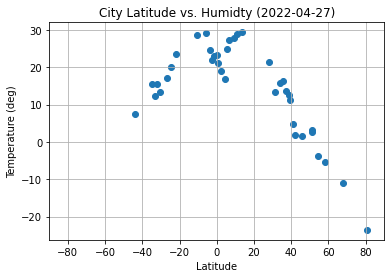

In [72]:
# Create a Scatter Plot for temperature vs latitude
x_values = clean_city_df['lat']
y_values = clean_city_df['max_temp']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.xlim([-90,90])
plt.grid()
plt.title(f'City Latitude vs. Humidty ({dt})')
plt.savefig('Fig1 - Latitude vs. Temperature Plot.png')
plt.show()


## Latitude vs. Humidity Plot

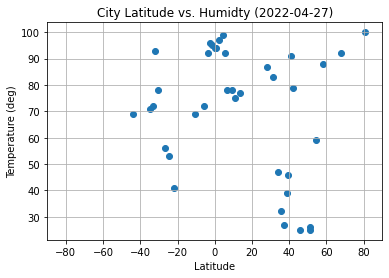

In [73]:
x_values = clean_city_df['lat']
y_values = clean_city_df['humidity']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Humidity ({dt})')
plt.savefig('Fig1 - Latitude vs. Humidity Plot.png')
plt.show()


## Latitude vs. Cloudiness Plot

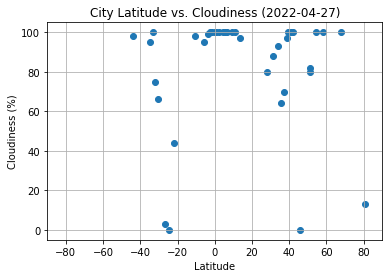

In [75]:
x_values = clean_city_df['lat']
y_values = clean_city_df['cloudiness']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Cloudiness ({dt})')
plt.savefig('Fig3 - Latitude vs. Cloudiness Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

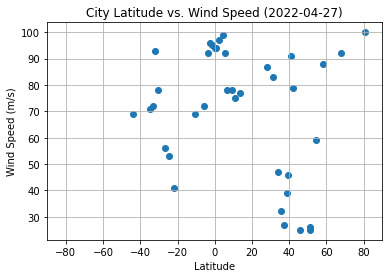

In [76]:
x_values = clean_city_df['lat']
y_values = clean_city_df['wind_speed']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Wind Speed ({dt})')
plt.savefig('Fig3 - Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

In [79]:
# Filter DataFrame, Northen hemispere cities are latitude > 0 and Southern Hemispwhere latitude < 0. 
north_hemi = clean_city_df.loc[clean_city_df['lat'] > 0]
south_hemi = clean_city_df.loc[clean_city_df['lat'] < 0]


City_ID
0     77.314587
1     73.190196
2     79.060868
3     60.976226
4     75.885785
5     76.270088
6     74.218206
7     65.252354
8     77.110059
9     77.702990
10    68.597575
11    72.070060
12    72.886432
13    76.523115
14    62.885098
15    72.352796
16    67.101500
17    67.277059
18    72.601860
19    72.651083
20    70.714893
21    66.567919
22    71.712958
23    64.277364
24    67.495805
25    65.279614
26    73.534150
27    66.022461
28    68.122988
29    73.078286
30    67.792486
31    71.127395
32    71.333577
33    77.501995
34    66.771167
35    71.883339
36    64.838246
37    67.017420
Name: lat, dtype: float64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8418492353592198
The correlation between both factors is -0.92


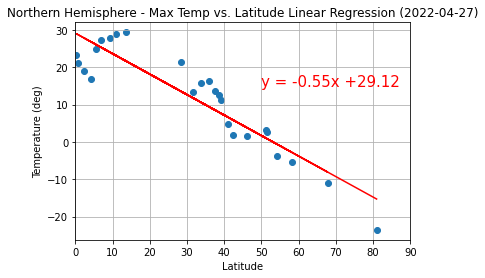

In [101]:
x_values = north_hemi['lat']
y_values = north_hemi['max_temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7444586414080824
The correlation between both factors is 0.86


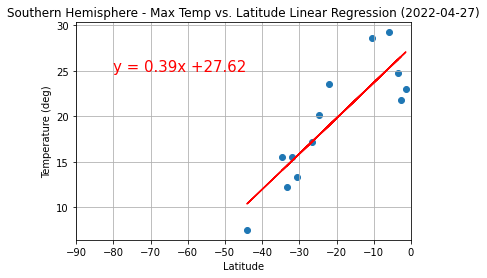

In [100]:
x_values = south_hemi['lat']
y_values = south_hemi['max_temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.annotate(line_eq,(-80,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10520424384539838
The correlation between both factors is -0.32


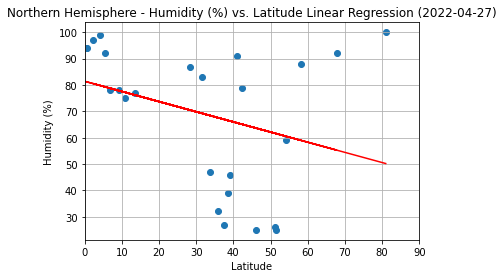

In [99]:
x_values = north_hemi['lat']
y_values = north_hemi['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16213639334908603
The correlation between both factors is 0.4


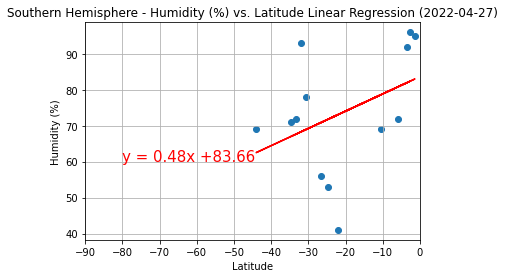

In [104]:
x_values = south_hemi['lat']
y_values = south_hemi['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-80,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2190686092024501
The correlation between both factors is -0.47


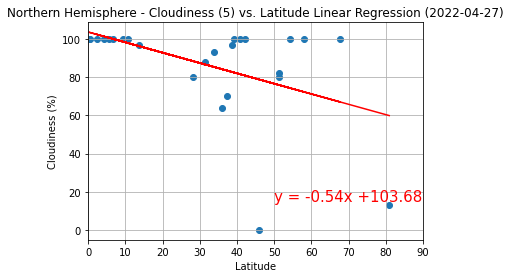

The linear regression of this is somewhat meaningful.


In [98]:
x_values = north_hemi['lat']
y_values = north_hemi['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

print('The linear regression of this is somewhat meaningful.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06360919889203592
The correlation between both factors is 0.25


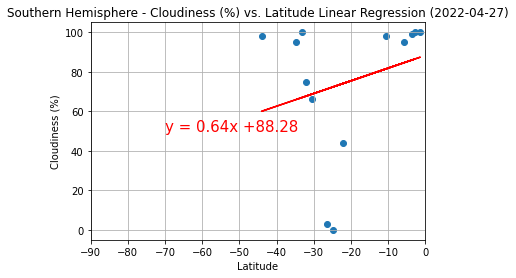

The linear regression of this is somewhat meaningful.


In [106]:
x_values = south_hemi['lat']
y_values = south_hemi['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-70,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

print('The linear regression of this is somewhat meaningful.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10520424384539838
The correlation between both factors is -0.32


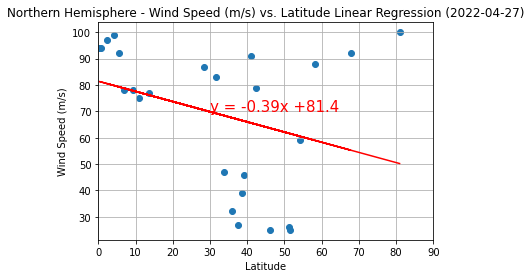

The linear regression of this is unmeaningful as the data have so many variance. Prediciting the wind speed based on latitude is not possible using this model.


In [110]:
x_values = north_hemi['lat']
y_values = north_hemi['wind_speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(30,70),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

print('The linear regression of this is unmeaningful as the data have so many variance. Prediciting the wind speed based on latitude is not possible using this model.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16213639334908603
The correlation between both factors is 0.4


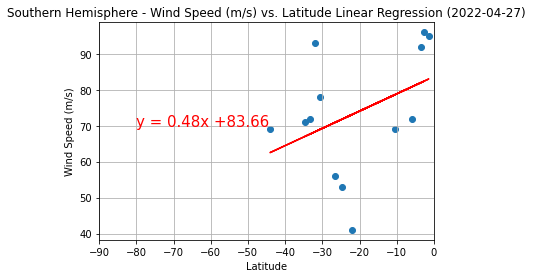

The linear regression of this is unmeaningful as the data have so many variance. Prediciting the wind speed based on latitude is not possible using this model.


In [109]:
x_values = south_hemi['lat']
y_values = south_hemi['wind_speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(-80,70),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

print('The linear regression of this is unmeaningful as the data have so many variance. Prediciting the wind speed based on latitude is not possible using this model.')